In [1]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

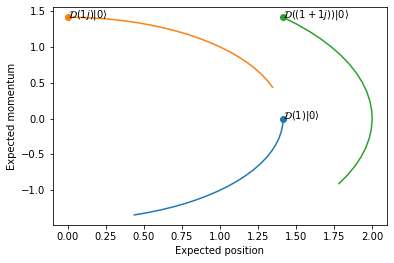

In [3]:
# Problem 2
N = 10
m = 1
omega = 2 * np.pi
hbar = 1

for alpha in [1, 1j, 1+1j]:
    Psi = qt.coherent(N, alpha)
    x = qt.expect(qt.position(N), Psi)
    p = qt.expect(qt.momentum(N), Psi)
    plt.scatter(x, p)
    plt.annotate(f"$\\mathcal {{ D }} ({alpha})| 0 \\rangle$", [x, p])
# Don't call plt.show() yet, because we want to see how these states change in time

def U(t):
    return (-1j * omega * t * (qt.num(N) + qt.qeye(N) / 2)).expm()

for alpha in [1, 1j, 1+1j]:
    x = []
    p = []
    for t in np.linspace(0, 0.2, 20):
        Psi = U(t) * qt.coherent(N, alpha)
        x.append(qt.expect(qt.position(N), Psi))
        p.append(qt.expect(qt.momentum(N), Psi))
    plt.plot(x, p)
plt.xlabel("Expected position")
plt.ylabel("Expected momentum")
plt.show()

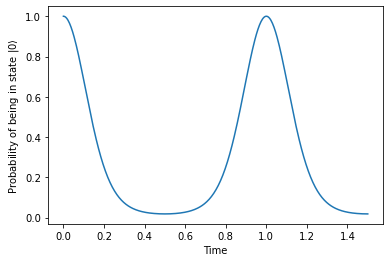

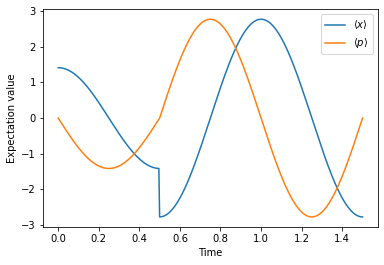

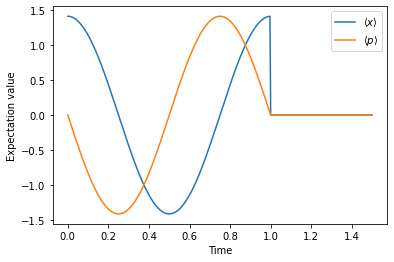

In [8]:
# Problem 3
N = 10
m = 1
omega = 2 * np.pi
hbar = 1

H = hbar * omega * (qt.num(N) + qt.qeye(N) / 2)
Psi = qt.coherent(N, 1)

def U(t, t_w):
    if t < t_w:
        return (-1j*H*t/hbar).expm()
    return (-1j*H*(t-t_w)/hbar).expm() * qt.displace(N,-1) * (-1j*H*t_w/hbar).expm()

times = np.linspace(0, 1.5, 400)
probabilities = [qt.expect(qt.basis(N, 0).proj(), U(t_w, t_w) * Psi) for t_w in times]
plt.plot(times, probabilities)
plt.xlabel("Time")
plt.ylabel("Probability of being in state $|0\\rangle$")
plt.show()

def plot(t_w):
    states = [U(t, t_w) * Psi for t in times]
    x = [qt.expect(qt.position(N), state) for state in states]
    p = [qt.expect(qt.momentum(N), state) for state in states]
    plt.xlabel("Time")
    plt.ylabel("Expectation value")
    plt.plot(times, x, label = "$\\langle x \\rangle$")
    plt.plot(times, p, label = "$\\langle p \\rangle$")
    plt.legend()
    plt.show()

plot(0.5)
plot(1)